In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'peak_fwhm_nlpi'

In [4]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type / 'all_motors_worse'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [5]:
!ls {data_base_dir}

initial_motor_positions.json
peak_fwhm_nlpi_moo_100_2022-11-22_images
peak_fwhm_nlpi_moo_100_2022-11-22_steps
peak_fwhm_nlpi_moo_autofocusing.ini
peak_fwhm_nlpi_moo_optimization_final_101_2022-11-22_10:19.gz


### peak_fwhm_150_2022-11-21

In [6]:
!ls {data_base_dir}

initial_motor_positions.json
peak_fwhm_nlpi_moo_100_2022-11-22_images
peak_fwhm_nlpi_moo_100_2022-11-22_steps
peak_fwhm_nlpi_moo_autofocusing.ini
peak_fwhm_nlpi_moo_optimization_final_101_2022-11-22_10:19.gz


In [7]:
log_file = Path(data_base_dir / 'peak_fwhm_nlpi_moo_optimization_final_101_2022-11-22_10:19.gz')
log_file.exists()

True

In [8]:
hist_dir = Path(data_base_dir / 'peak_fwhm_nlpi_moo_100_2022-11-22_steps')
hist_dir.exists()

True

In [13]:
study = analysis.create_study_from_trials(log_file, n_objectives=3)

[I 2022-11-23 17:54:29,270] A new study created in memory with name: no-name-b0103998-6ff4-43b8-a9c9-c7b1dea103e8


Assuming minimization for all objectives.


In [14]:
n_steps = len(study.trials)

In [15]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

Trial values: peak_distance 2.537e-01 fwhm 9.638e-02 nlpi -9.878e+00
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39654798529356095, 'h_fwhm': 0.012355720240853074, 'h_centroid': -0.0035970749534196544, 'h_peak': -0.08876609541454379, 'v_sigma': 0.46633800863702407, 'v_fwhm': 0.09558733880422499, 'v_centroid': -0.0026490776445018682, 'v_peak': 0.23766783899960922, 'integral_intensity': 275.82872363614695, 'peak_intensity': 19490.25, 'gaussian_fit': {}}}


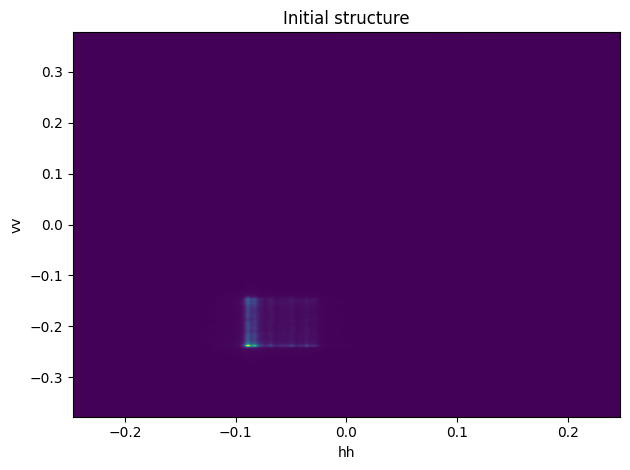

In [16]:
print(f"Trial values: peak_distance {study.trials[0].values[0]:4.3e} fwhm {study.trials[0].values[1]:4.3e} " +
     f"nlpi {study.trials[0].values[2]:4.3e}")
print("Trial dw:")
print(study.trials[0].user_attrs["dw"].__dict__)


plt.pcolormesh(hists[0].hh[700:-700], hists[0].vv[700:-700], hists[0].data_2D[700:-700,700:-700].T)
plt.xlabel('hh')
plt.ylabel('vv')
plt.title("Initial structure")
plt.tight_layout()
plt.show()

In [17]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [18]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[14, 81, 86, 57, 80, 91, 87]
88 [0.0037071853483713556, 0.015166689854093524, -11.083139419555664]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3968078903818005, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0008661593715613147, 'h_peak': -0.0029263547938860714, 'v_sigma': 0.46511471960479805, 'v_fwhm': 0.013005080109418365, 'v_centroid': 0.005690764961103961, 'v_peak': -0.0022758890191481784, 'integral_intensity': 275.1684382238761, 'peak_intensity': 65064.848, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.015166689854093524


Trial number 26
Trial values: peak_distance 2.375e-01 fwhm 1.150e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.400441484013916, 'h_fwhm': 0.008453913849004735, 'h_centroid': 0.0032084223218796504, 'h_peak': 0.1596489115331172, 'v_sigma': 0.4693920107076215, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.001411755436126566, 'v_peak': 0.17589370847987496, 'integral_intensity': 270.80667906756435, 'peak_intensity': 46737.0, 'gaussian_fit': {}}}
Actual fwhm 0.011504617267917006


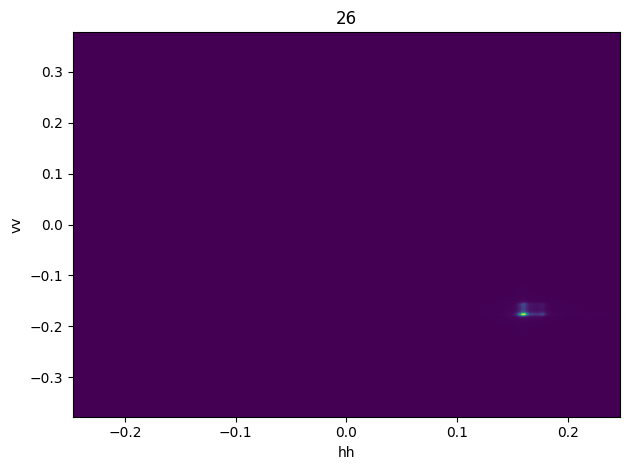

Trial number 44
Trial values: peak_distance 7.197e-03 fwhm 1.428e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39782393200670646, 'h_fwhm': 0.012355720240853074, 'h_centroid': -0.00040875343564314437, 'h_peak': 0.0022760537285780058, 'v_sigma': 0.4664016158931774, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.005967728609484829, 'v_peak': -0.006827667057444388, 'integral_intensity': 273.4003520465468, 'peak_intensity': 53020.668, 'gaussian_fit': {}}}
Actual fwhm 0.01427677433937982


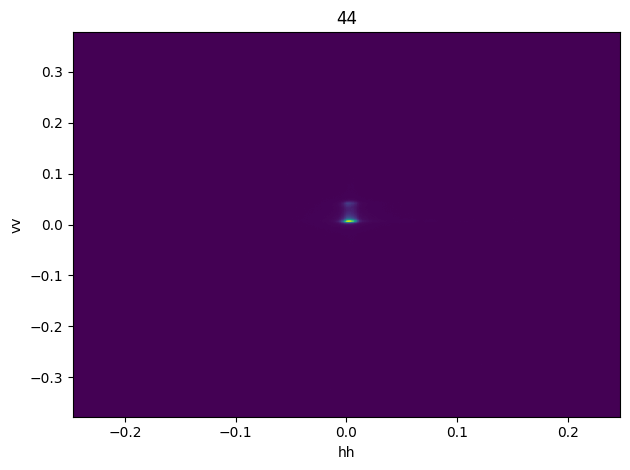

Trial number 50
Trial values: peak_distance 1.464e-02 fwhm 1.301e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39743042543653634, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.001342546807733519, 'h_peak': -0.014631773969430356, 'v_sigma': 0.4659961970757, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.005613074276078683, 'v_peak': 0.0003251270027353485, 'integral_intensity': 274.0200157519639, 'peak_intensity': 64993.0, 'gaussian_fit': {}}}
Actual fwhm 0.013005682483180311


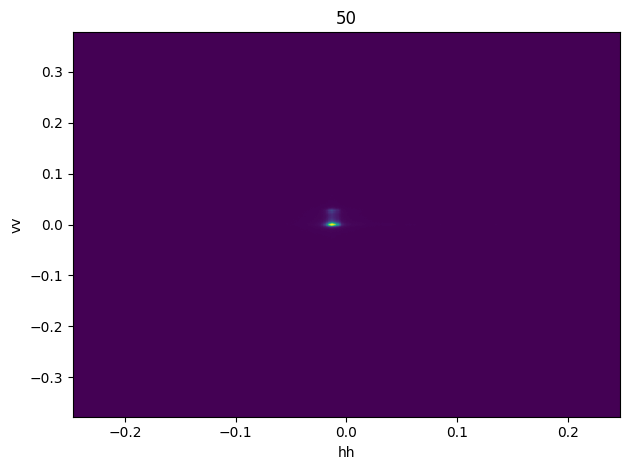

Trial number 56
Trial values: peak_distance 5.405e-02 fwhm 1.263e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3970026941762116, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.0026348287993332997, 'h_peak': -0.04974803149606299, 'v_sigma': 0.46529963858562484, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.006473661248330792, 'v_peak': -0.02113325517780386, 'integral_intensity': 274.9329351638883, 'peak_intensity': 64903.9, 'gaussian_fit': {}}}
Actual fwhm 0.012626269465118776


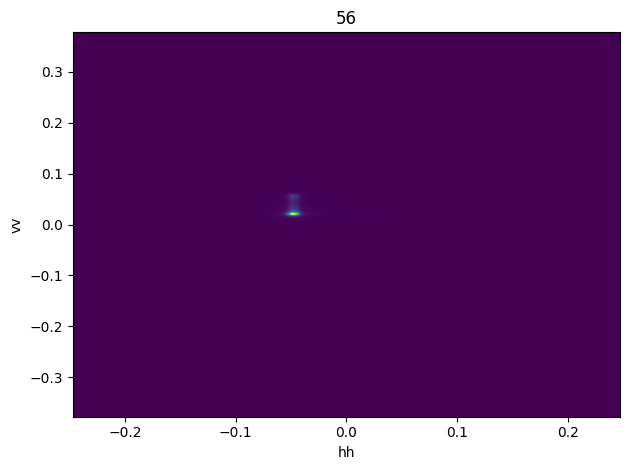

Trial number 85
Trial values: peak_distance 2.219e-02 fwhm 1.341e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3969353155944194, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.0012699322130384216, 'h_peak': -0.013981472904122291, 'v_sigma': 0.4652050874571173, 'v_fwhm': 0.010404064087534692, 'v_centroid': 0.004942748903303706, 'v_peak': 0.017231731144978495, 'integral_intensity': 275.0394013829175, 'peak_intensity': 65390.492, 'gaussian_fit': {}}}
Actual fwhm 0.01340571553121739


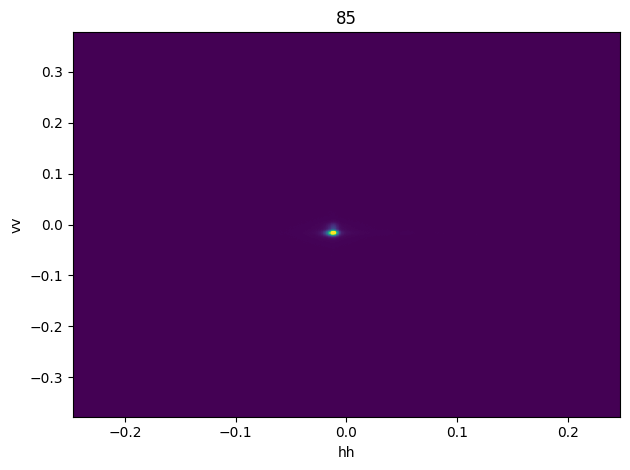

Trial number 88
Trial values: peak_distance 3.707e-03 fwhm 1.517e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3968078903818005, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0008661593715613147, 'h_peak': -0.0029263547938860714, 'v_sigma': 0.46511471960479805, 'v_fwhm': 0.013005080109418365, 'v_centroid': 0.005690764961103961, 'v_peak': -0.0022758890191481784, 'integral_intensity': 275.1684382238761, 'peak_intensity': 65064.848, 'gaussian_fit': {}}}
Actual fwhm 0.015166689854093524


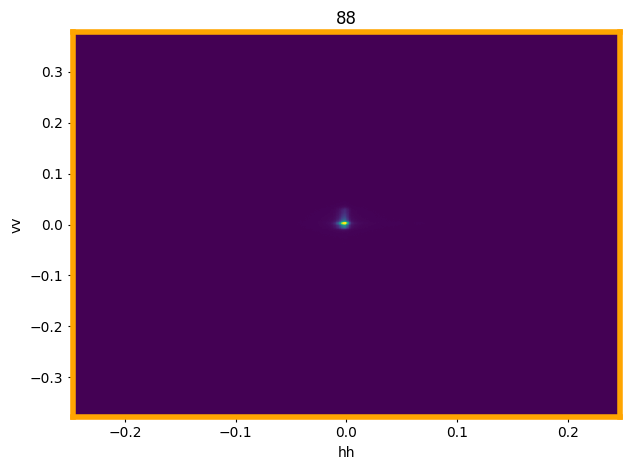

Trial number 89
Trial values: peak_distance 1.238e-02 fwhm 1.301e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3967589587527434, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.00045039269667218607, 'h_peak': 0.006177860120426101, 'v_sigma': 0.46517991234862255, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.00613798204033722, 'v_peak': -0.01072919109026975, 'integral_intensity': 275.1125799940652, 'peak_intensity': 64970.19, 'gaussian_fit': {}}}
Actual fwhm 0.013005682483180311


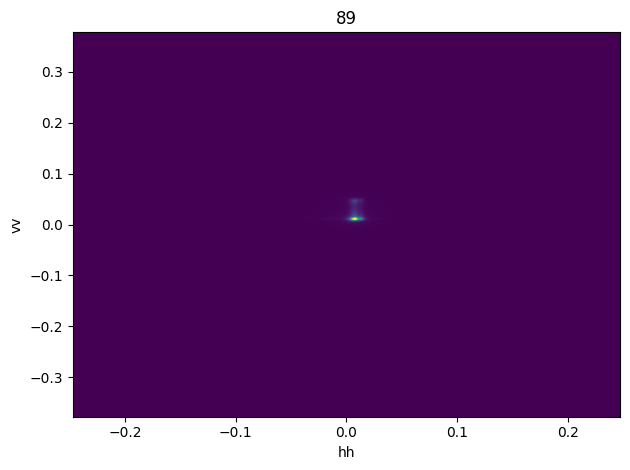

In [19]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [20]:
study.best_trials[0].values

[0.2375423575628404, 0.011504617267917006, -10.752291679382324]

In [21]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak_distance', 'fwhm', 'nlpi'])

In [22]:
pareto_df

,number,peak_distance,fwhm,nlpi,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
26,26,0.237542,0.011505,-10.752292,0.159649,0.175894,0.008454,0.007803,46737.000000
44,44,0.007197,0.014277,-10.878437,0.002276,-0.006828,0.012356,0.007153,53020.667969
50,50,0.014635,0.013006,-11.082035,-0.014632,0.000325,0.010405,0.007803,64993.000000
56,56,0.054051,0.012626,-11.080663,-0.049748,-0.021133,0.010405,0.007153,64903.898438
85,85,0.022190,0.013406,-11.088132,-0.013981,0.017232,0.008454,0.010404,65390.492188
88,88,0.003707,0.015167,-11.083139,-0.002926,-0.002276,0.007804,0.013005,65064.847656
89,89,0.012381,0.013006,-11.081684,0.006178,-0.010729,0.010405,0.007803,64970.191406


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13144/2375896861.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)


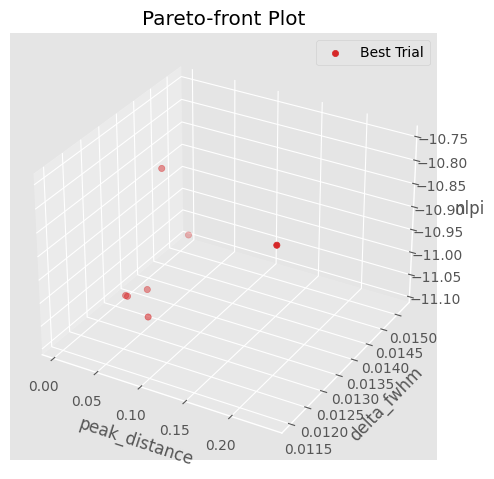

In [23]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)
#plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13144/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


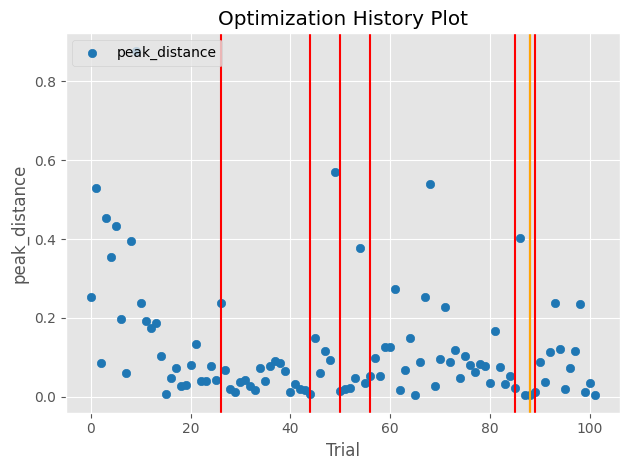

In [24]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13144/1279663034.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")


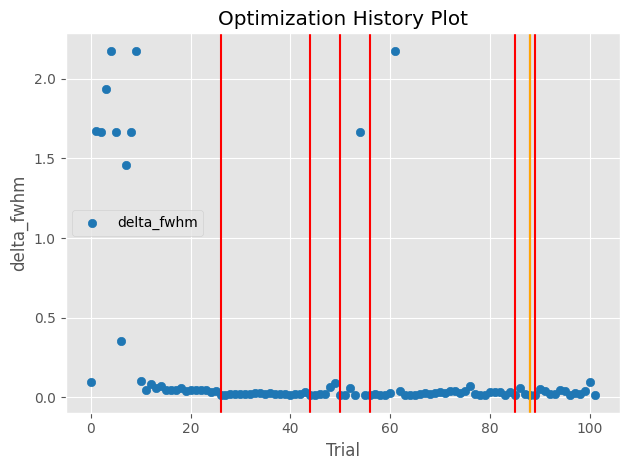

In [25]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13144/3199083138.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")


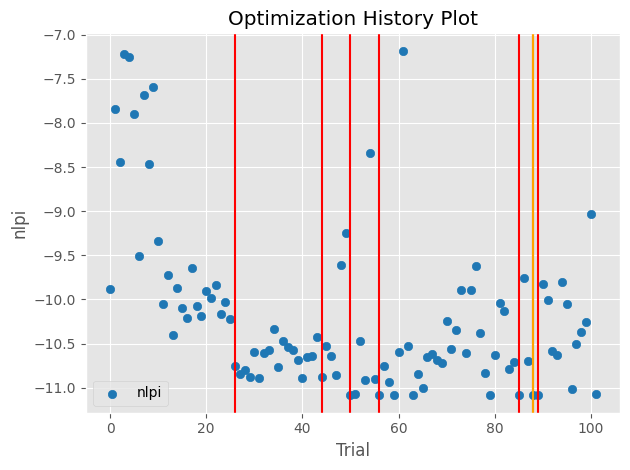

In [26]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### The remaining part is just testing how lwsi with thresholding performs in selecting the structures. This is for my own satisfaction. - SK

In [27]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13144/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


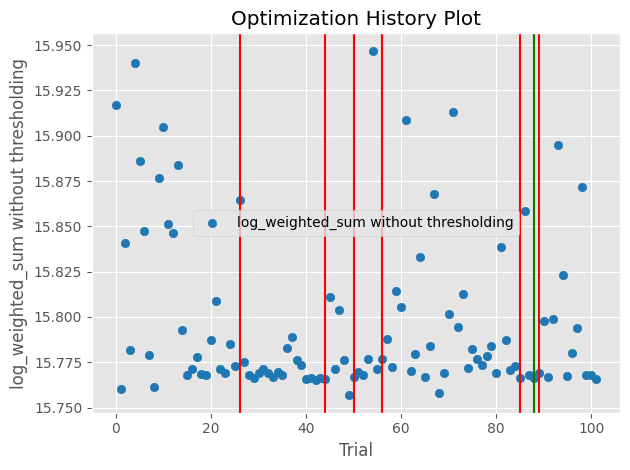

In [28]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13144/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


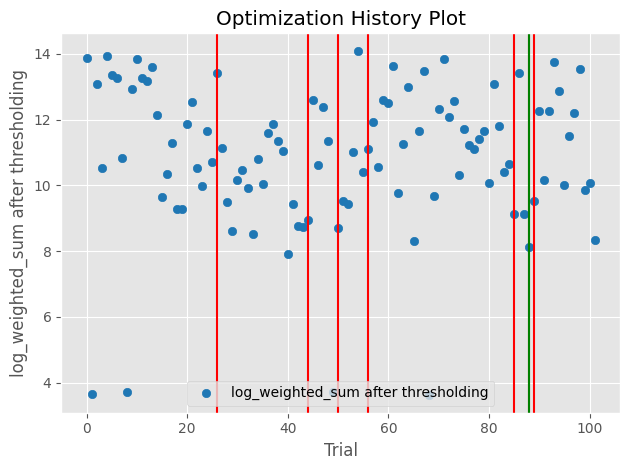

In [29]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [30]:
test_val_fns = [lambda t: t.values[0], lambda t: t.values[2], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins))

88


1 [0.5304944234421629, -7.837620258331299, 3.6669733606690653]


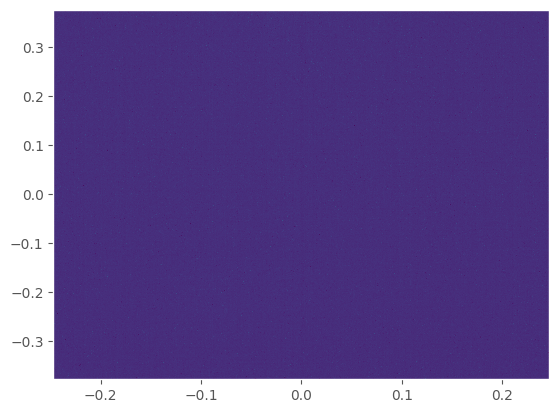

8 [0.3942101598332839, -8.460326194763184, 3.7010238770403894]


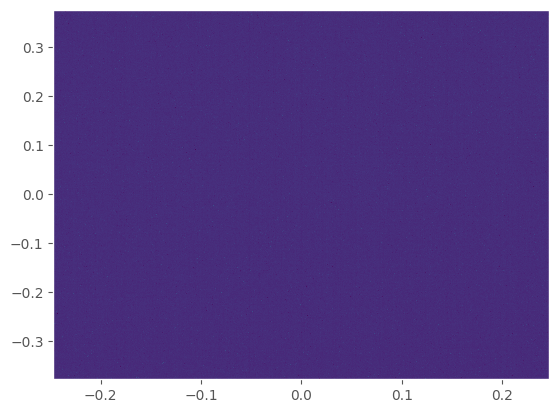

40 [0.01238051747082422, -10.885761260986328, 7.906949866020007]


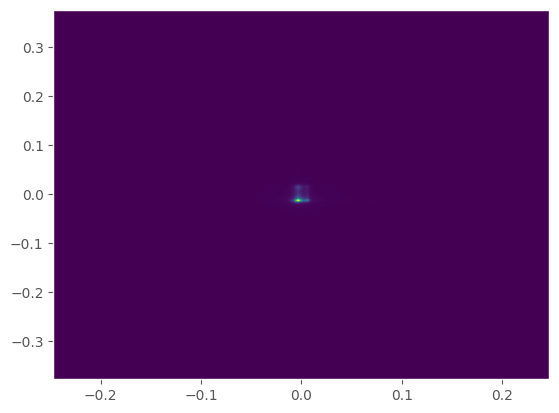

68 [0.5384968723312807, -10.688148498535156, 3.6071166003960653]


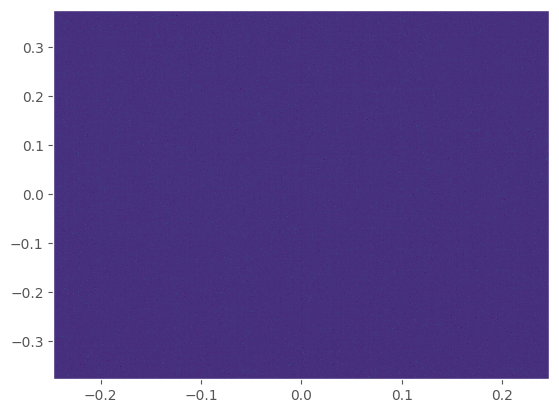

85 [0.02219040654926195, -11.08813190460205, 9.123762150312936]


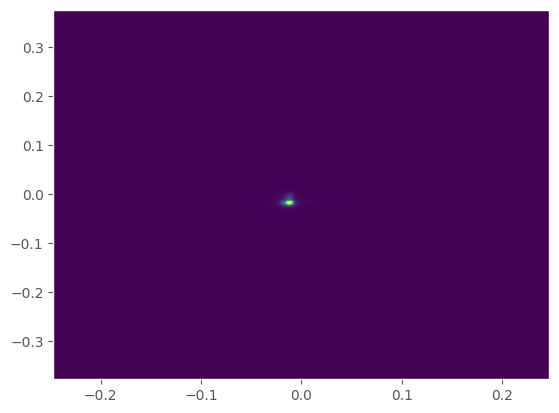

88 [0.0037071853483713556, -11.083139419555664, 8.133985689737512]


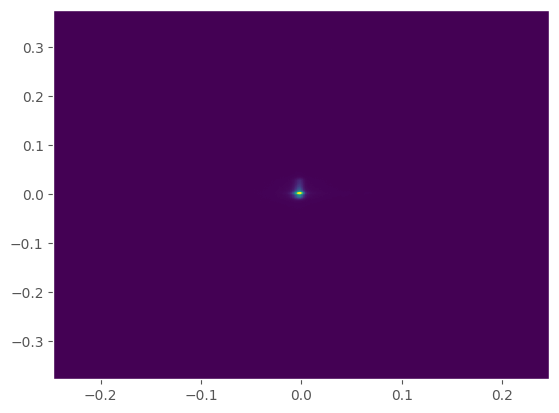

In [31]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [32]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

88 86
